In [19]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autots as at
import yfinance as yf
import plotly.express as px

In [33]:
data = yf.download("BTC-USD",
                  start = "2020-01-01",
                  end = "2022-04-01",
                  progress = False)
data = pd.DataFrame(data)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275


In [34]:
res_data = data.reset_index()
res_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
817,2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722
818,2022-03-28,46821.851562,48086.835938,46690.203125,47128.003906,47128.003906,36362175703
819,2022-03-29,47100.437500,48022.289062,47100.437500,47465.730469,47465.730469,31397059069
820,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664062,47062.664062,29333883962
821,2022-03-31,47062.148438,47512.027344,45390.539062,45538.675781,45538.675781,33327427106


In [35]:
res_data = res_data[["Date", "Close"]]
res_data["Date"] = pd.to_datetime(res_data.Date)
# res_data["Close"].plot(figsize=(16, 8), title="BTC Current Prices", fontsize=15, label="Close Price")

px.line(res_data['Close'], x=res_data['Date'], y=res_data['Close'], title='Crypto forecast')

# plt.figure(figsize = (16, 8))
# plt.grid(True)
# plt.plot(data['Close'], color = 'blue', label='BTC current price')
# plt.title('Bitcoin Price')
# plt.xlabel('Date', fontsize = 18)
# plt.ylabel('Price', fontsize = 18)
# plt.legend()
# plt.show()

In [41]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', 
               ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(res_data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print("Price prediction of Bitcoin")
print(forecast)

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
6/6 [==============================] - 9s 8ms/step - loss: 0.4068
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3851
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 0.3601
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3423
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.3187
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2972
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2620
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.2400
Epoch 9/50
6/6 [==============================] - 0s 11ms/step - loss: 0.2205
Epoch 10/50
6/6 [==============================] - 0s 10ms/step - loss: 0.2076
Epoch 11/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1929
Epoch 12/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1918
E

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log



Model Number: 21 with model LastValueNaive in generation 0 of 10
Model Number: 22 with model LastValueNaive in generation 0 of 10
Model Number: 23 with model LastValueNaive in generation 0 of 10
Model Number: 24 with model SeasonalNaive in generation 0 of 10
Model Number: 25 with model SeasonalNaive in generation 0 of 10
Model Number: 26 with model SeasonalNaive in generation 0 of 10
Model Number: 27 with model SeasonalNaive in generation 0 of 10
Model Number: 28 with model UnobservedComponents in generation 0 of 10
Model Number: 29 with model UnobservedComponents in generation 0 of 10
Model Number: 30 with model UnobservedComponents in generation 0 of 10
Model Number: 31 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 31: VAR
Model Number: 32 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 32: VAR
Model Number: 33 with model VAR in generation 0 of 10
Template E

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero en

Model Number: 42 with model AverageValueNaive in generation 0 of 10
Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
Model Number: 47 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 47: FBProphet
Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regresso

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log



Model Number: 54 with model MultivariateRegression in generation 0 of 10
Model Number: 55 with model UnivariateMotif in generation 0 of 10
Model Number: 56 with model MultivariateMotif in generation 0 of 10
Model Number: 57 with model SectionalMotif in generation 0 of 10
Model Number: 58 with model NVAR in generation 0 of 10
Model Number: 59 with model Theta in generation 0 of 10
Model Number: 60 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 60: ARDL
Model Number: 61 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 61: VAR
Model Number: 62 with model VECM in generation 0 of 10
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 62: VECM
Model Number: 63 with model SeasonalNaive in generation 0 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised

Model Number: 64 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 64: GluonTS
Model Number: 65 with model UnivariateMotif in generation 0 of 10
Model Number: 66 with model WindowRegression in generation 0 of 10
Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 67: GLM
Model Number: 68 with model LastValueNaive in generation 0 of 10
Model Number: 69 with model SectionalMotif in generation 0 of 10
Model Number: 70 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 70: VECM
Model Number: 71 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 71: VECM
M

3/3 [==============================] - 0s 53ms/step - loss: 2982.4055 - val_loss: 2061.7739
Epoch 11/100
3/3 [==============================] - 0s 58ms/step - loss: 2982.3350 - val_loss: 2061.6235
Epoch 12/100
3/3 [==============================] - 0s 57ms/step - loss: 2982.4875 - val_loss: 2061.6108
Epoch 13/100
3/3 [==============================] - 0s 59ms/step - loss: 2982.2817 - val_loss: 2061.4951
Epoch 14/100
3/3 [==============================] - 0s 58ms/step - loss: 2982.2075 - val_loss: 2061.3848
Epoch 15/100
3/3 [==============================] - 0s 53ms/step - loss: 2982.0930 - val_loss: 2061.4106
Epoch 16/100
3/3 [==============================] - 0s 58ms/step - loss: 2982.1194 - val_loss: 2061.3542
Epoch 17/100
3/3 [==============================] - 0s 59ms/step - loss: 2982.3108 - val_loss: 2061.2822
Epoch 18/100
3/3 [==============================] - 0s 62ms/step - loss: 2982.4285 - val_loss: 2061.2761
Epoch 19/100
3/3 [==============================] - 0s 60ms/step - l

3/3 [==============================] - 0s 57ms/step - loss: 2979.5825 - val_loss: 2056.7471
Epoch 89/100
3/3 [==============================] - 0s 57ms/step - loss: 2979.5410 - val_loss: 2056.6541
Epoch 90/100
3/3 [==============================] - 0s 59ms/step - loss: 2979.7485 - val_loss: 2056.5571
Epoch 91/100
3/3 [==============================] - 0s 59ms/step - loss: 2979.6218 - val_loss: 2056.3462
Epoch 92/100
3/3 [==============================] - 0s 57ms/step - loss: 2979.6567 - val_loss: 2056.4072
Epoch 93/100
3/3 [==============================] - 0s 55ms/step - loss: 2979.9768 - val_loss: 2056.4106
Epoch 94/100
3/3 [==============================] - 0s 60ms/step - loss: 2979.0723 - val_loss: 2056.3408
Epoch 95/100
3/3 [==============================] - 0s 60ms/step - loss: 2979.2483 - val_loss: 2056.1604
Epoch 96/100
3/3 [==============================] - 0s 58ms/step - loss: 2979.4697 - val_loss: 2056.0464
Epoch 97/100
3/3 [==============================] - 0s 60ms/step - l

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power



Model Number: 118 with model AverageValueNaive in generation 0 of 10
Model Number: 119 with model SeasonalNaive in generation 0 of 10
Model Number: 120 with model NVAR in generation 0 of 10
Model Number: 121 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 121: VECM
Model Number: 122 with model MultivariateMotif in generation 0 of 10
Model Number: 123 with model LastValueNaive in generation 0 of 10
Model Number: 124 with model ARDL in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 124: ARDL
Model Number: 125 with model MultivariateMotif in generation 0 of 10
Model Number: 126 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 126: FBProphet
Model Number: 127 with model VAR in generation 0 of 10
Template Eval Error: IndexError('tuple index out of range') in model 127: VAR
Model Number: 128 with model Gluon

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 194 with model UnivariateMotif in generation 1 of 10
Model Number: 195 with model ZeroesNaive in generation 1 of 10
Model Number: 196 with model ZeroesNaive in generation 1 of 10
Model Number: 197 with model GLM in generation 1 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 197: GLM
Model Number: 198 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 198: GLM
Model Number: 199 with model GLM in generation 1 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning:

All-NaN slice encountered

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 200 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 200: GLM
Model Number: 201 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 201: GluonTS
Model Number: 202 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 202: GluonTS
Model Number: 203 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 203: GluonTS
Model Number: 204 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed versi

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log




Template Eval Error: ValueError('Only gave one variable to VAR') in model 208: VAR
Model Number: 209 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 209: VECM
Model Number: 210 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 210: VECM
Model Number: 211 with model VECM in generation 1 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 211: VECM
Model Number: 212 with model VECM in generation 1 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 212: VECM
Model Number: 213 with model FBProphet in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 213: FBProphet
Model Number: 214 with model FBProphet in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 214: FBProphet
Model Number: 215 with model FBProphet in generation 1 of 10

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning:

All-NaN slice encountered

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 221 with model MultivariateMotif in generation 2 of 10
Model Number: 222 with model MultivariateMotif in generation 2 of 10
Model Number: 223 with model MultivariateMotif in generation 2 of 10
Model Number: 224 with model MultivariateMotif in generation 2 of 10
Model Number: 225 with model LastValueNaive in generation 2 of 10
Model Number: 226 with model LastValueNaive in generation 2 of 10
Model Number: 227 with model MultivariateRegression in generation 2 of 10
Model Number: 228 with model MultivariateRegression in generation 2 of 10
Model Number: 229 with model MultivariateRegression in generation 2 of 10
Model Number: 230 with model MultivariateRegression in generation 2 of 10
Model Number: 231 with model AverageValueNaive in generation 2 of 10
Model Number: 232 with model AverageValueNaive in generation 2 of 10
Model Number: 233 with model AverageValueNaive in generation 2 of 10
Model Number: 234 with model UnivariateMotif in generation 2 of 10
Model Number: 235 with

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.676e+09, tolerance: 1.244e+06



Model Number: 267 with model DatepartRegression in generation 2 of 10
Model Number: 268 with model ARDL in generation 2 of 10
Model Number: 269 with model ARDL in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 269: ARDL
Model Number: 270 with model ARDL in generation 2 of 10
Model Number: 271 with model ARDL in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 271: ARDL
Model Number: 272 with model ZeroesNaive in generation 2 of 10
Model Number: 273 with model ZeroesNaive in generation 2 of 10
Model Number: 274 with model ZeroesNaive in generation 2 of 10
Model Number: 275 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 275: GLM
Model Number: 276 with model GL

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'cffilter', '1': 'IntermittentOccurrence', '2': 'Slice', '3': 'MinMaxScaler', '4': 'ClipOutliers'}, 'transformation_params': {'0': {}, '1': {'center': 'mean'}, '2': {'method': 0.5}, '3': {}, '4': {'method': 'clip', 'std_threshold': 4, 'fillna': None}}}. fail_on_forecast_nan=True") in model 324: UnobservedComponents
Model Number: 325 with model UnobservedComponents in generation 3 of 10
Model Number: 326 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 326: UnobservedComponents
Model Number: 327 with model ETS in generation 3 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning:

All-NaN slice encountered

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning:

All-NaN slice encountered

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Model Number: 328 with model ETS in generation 3 of 10
Model Number: 329 with model ETS in generation 3 of 10
Model Number: 330 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 331 with model SeasonalNaive in generation 3 of 10
Model Number: 332 with model SeasonalNaive in generation 3 of 10
Model Number: 333 with model SeasonalNaive in generation 3 of 10
Model Number: 334 with model SeasonalNaive in generation 3 of 10
Model Number: 335 with model DatepartRegression in generation 3 of 10
[LibLinear]Model Number: 336 with model DatepartRegression in generation 3 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 337 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 337: DatepartRegression
Model Number: 338 with model WindowRegression in generation 3 of 10
Model Number: 339 with model WindowRegression in generation 3 of 10
Model Number: 340 with model WindowRegression in generation 3 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 341 with model GLS in generation 3 of 10
Model Number: 342 with model GLS in generation 3 of 10
Model Number: 343 with model GLS in generation 3 of 10
Model Number: 344 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 344: ARDL
Model Number: 345 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 345: ARDL
Model Number: 346 with model ARDL in generation 3 of 10
Model Number: 347 with model ARDL in generation 3 of 10
Model Number: 348 with model ZeroesNaive in generation 3 of 10
Model Number: 349 with model ZeroesNaive in generation 3 of 10
Model Number: 350 with model GLM in generation 3 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 350: GLM
Model Number: 351 with model GLM in generation 3 of 10
Model Number: 352 with model GLM in generation 3

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 352: GLM
Model Number: 353 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 353: GluonTS
Model Number: 354 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 354: GluonTS
Model Number: 355 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 355: GluonTS
Model Number: 356 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 356: GluonTS
Model Number: 357 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one v

Model Number: 418 with model GLS in generation 4 of 10
Model Number: 419 with model GLS in generation 4 of 10
Model Number: 420 with model ZeroesNaive in generation 4 of 10
Model Number: 421 with model ZeroesNaive in generation 4 of 10
Model Number: 422 with model ZeroesNaive in generation 4 of 10
Model Number: 423 with model GLM in generation 4 of 10
Model Number: 424 with model GLM in generation 4 of 10
Model Number: 425 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 425: GLM
Model Number: 426 with model GLM in generation 4 of 10
Model Number: 427 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 427: GluonTS


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning:

invalid value encountered in log



Model Number: 428 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 428: GluonTS
Model Number: 429 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 429: GluonTS
Model Number: 430 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 430: GluonTS
Model Number: 431 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 431: VAR
Model Number: 432 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 432: VAR
Model Number: 433 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 4

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Epoch 1/50
3/3 [==============================] - 11s 495ms/step - loss: 4.3484 - val_loss: 3.0486
Epoch 2/50
3/3 [==============================] - 0s 71ms/step - loss: 2.1043 - val_loss: 2.2935
Epoch 3/50
3/3 [==============================] - 0s 72ms/step - loss: 1.7721 - val_loss: 1.5357
Epoch 4/50
3/3 [==============================] - 0s 74ms/step - loss: 1.5398 - val_loss: 0.9282
Epoch 5/50
3/3 [==============================] - 0s 69ms/step - loss: 1.2345 - val_loss: 0.5830
Epoch 6/50
3/3 [==============================] - 0s 72ms/step - loss: 1.5553 - val_loss: 0.2951
Epoch 7/50
3/3 [==============================] - 0s 71ms/step - loss: 1.1022 - val_loss: 0.1617
Epoch 8/50
3/3 [==============================] - 0s 68ms/step - loss: 1.3923 - val_loss: 0.1072
Epoch 9/50
3/3 [==============================] - 0s 63ms/step - loss: 1.0845 - val_loss: 0.2325
Epoch 10/50
3/3 [==============================] - 0s 71ms/step - loss: 0.9129 - val_loss: 0.0696
Epoch 11/50
3/3 [==========

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Us

Model Number: 498 with model ZeroesNaive in generation 5 of 10
Model Number: 499 with model GLM in generation 5 of 10
Model Number: 500 with model GLM in generation 5 of 10
Model Number: 501 with model GLM in generation 5 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1342: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning:

invalid value encountered in log



Model Number: 502 with model GLM in generation 5 of 10
Template Eval Error: KeyError(Timestamp('2021-09-13 00:00:00', freq='D')) in model 502: GLM
Model Number: 503 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 503: GluonTS
Model Number: 504 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 504: GluonTS
Model Number: 505 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 505: GluonTS
Model Number: 506 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 506: GluonTS
Model Number: 507 with model VAR in generation 5 of 10
Templa

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log



Template Eval Error: ValueError('Only gave one variable to VECM') in model 511: VECM
Model Number: 512 with model VECM in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 512: VECM
Model Number: 513 with model VECM in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 513: VECM
Model Number: 514 with model VECM in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 514: VECM
Model Number: 515 with model FBProphet in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 515: FBProphet
Model Number: 516 with model FBProphet in generation 5 of 10
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 516: FBProphet
Model Number: 517 with model FBProphet in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised

Model Number: 519 with model NVAR in generation 6 of 10
Model Number: 520 with model NVAR in generation 6 of 10
Model Number: 521 with model NVAR in generation 6 of 10
Model Number: 522 with model NVAR in generation 6 of 10
Model Number: 523 with model MultivariateMotif in generation 6 of 10
Model Number: 524 with model MultivariateMotif in generation 6 of 10
Model Number: 525 with model MultivariateMotif in generation 6 of 10
Model Number: 526 with model MultivariateMotif in generation 6 of 10
Model Number: 527 with model SectionalMotif in generation 6 of 10
Model Number: 528 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 528: SectionalMotif
Model Number: 529 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (5)') in model 529: SectionalMotif
Model Number: 530 with model SectionalMotif in generation 6 of 10
Model Number: 531 with m

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radiu

Template Eval Error: ValueError('Model MultivariateRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 536: MultivariateRegression
Model Number: 537 with model MultivariateRegression in generation 6 of 10
Model Number: 538 with model MultivariateRegression in generation 6 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radiu

Template Eval Error: ValueError('Model MultivariateRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 538: MultivariateRegression
Model Number: 539 with model MultivariateRegression in generation 6 of 10
Model Number: 540 with model ARDL in generation 6 of 10
Model Number: 541 with model ARDL in generation 6 of 10
Model Number: 542 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 542: ARDL
Model Number: 543 with model ARDL in generation 6 of 10
Model Number: 544 with model UnivariateMotif in generation 6 of 10
Model Number: 545 with model UnivariateMotif in generation 6 of 10
Model Number: 546 with model UnivariateMotif in generation 6 of 10
Model Number: 547 with model UnivariateMotif in generation 6 of 10
Model Number: 548 with model WindowRegression in generation 6 of 10
Model Number: 549 with model WindowRegression in generation 6 of 10
Model Number: 550 with 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.943e+09, tolerance: 1.274e+06



Model Number: 572 with model GLM in generation 6 of 10
Model Number: 573 with model GLM in generation 6 of 10
Model Number: 574 with model GLM in generation 6 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 574: GLM
Model Number: 575 with model GLM in generation 6 of 10
Model Number: 576 with model ZeroesNaive in generation 6 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning:

invalid value encountered in log



Model Number: 577 with model ZeroesNaive in generation 6 of 10
Model Number: 578 with model ZeroesNaive in generation 6 of 10
Model Number: 579 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 579: GluonTS
Model Number: 580 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 580: GluonTS
Model Number: 581 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 581: GluonTS
Model Number: 582 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 582: GluonTS
Model Number: 583 with model VAR in generation 6 of 10
Template Eval Error: ValueE

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log




Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 588: VECM
Model Number: 589 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 589: VECM
Model Number: 590 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 590: VECM
Model Number: 591 with model FBProphet in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 591: FBProphet
Model Number: 592 with model FBProphet in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 592: FBProphet
Model Number: 593 with model FBProphet in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 593: FBProphet
Model Number: 594 with model FBProphet in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 59

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power



Model Number: 636 with model SeasonalNaive in generation 7 of 10
Model Number: 637 with model ETS in generation 7 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 638 with model ETS in generation 7 of 10
Model Number: 639 with model ETS in generation 7 of 10
Model Number: 640 with model ETS in generation 7 of 10
Model Number: 641 with model DatepartRegression in generation 7 of 10
Epoch 1/50
Template Eval Error: TypeError('in user code:\n\n    File "C:\\Users\\ibrag\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\keras\\engine\\training.py", line 1021, in train_function  *\n        return step_function(self, iterator)\n    File "C:\\Users\\ibrag\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\keras\\engine\\training.py", line 1010, in step_function

3/3 [==============================] - 0s 121ms/step - loss: 51538.2812 - val_loss: 40346.5312
Epoch 56/100
3/3 [==============================] - 0s 103ms/step - loss: 51535.5742 - val_loss: 40343.0508
Epoch 57/100
3/3 [==============================] - 0s 90ms/step - loss: 51531.4336 - val_loss: 40339.5820
Epoch 58/100
3/3 [==============================] - 0s 101ms/step - loss: 51526.8555 - val_loss: 40335.8867
Epoch 59/100
3/3 [==============================] - 0s 122ms/step - loss: 51523.2344 - val_loss: 40332.3320
Epoch 60/100
3/3 [==============================] - 0s 120ms/step - loss: 51518.4102 - val_loss: 40328.5117
Epoch 61/100
3/3 [==============================] - 0s 159ms/step - loss: 51511.7500 - val_loss: 40324.5430
Epoch 62/100
3/3 [==============================] - 0s 115ms/step - loss: 51510.0352 - val_loss: 40320.7617
Epoch 63/100
3/3 [==============================] - 0s 112ms/step - loss: 51503.5352 - val_loss: 40316.7656
Epoch 64/100
3/3 [========================

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log



Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 654: GluonTS
Model Number: 655 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 655: GluonTS
Model Number: 656 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 656: VAR
Model Number: 657 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 657: VAR
Model Number: 658 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 658: VAR
Model Number: 659 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 659: VAR
Model Number: 660 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power



Model Number: 678 with model MultivariateMotif in generation 8 of 10
Model Number: 679 with model MultivariateMotif in generation 8 of 10
Model Number: 680 with model Theta in generation 8 of 10
Model Number: 681 with model Theta in generation 8 of 10
Model Number: 682 with model Theta in generation 8 of 10
Model Number: 683 with model Theta in generation 8 of 10
Model Number: 684 with model ARDL in generation 8 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log



Model Number: 685 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 685: ARDL
Model Number: 686 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 686: ARDL
Model Number: 687 with model ARDL in generation 8 of 10
Model Number: 688 with model LastValueNaive in generation 8 of 10
Model Number: 689 with model LastValueNaive in generation 8 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log



Model Number: 690 with model LastValueNaive in generation 8 of 10
Model Number: 691 with model MultivariateRegression in generation 8 of 10
Model Number: 692 with model MultivariateRegression in generation 8 of 10
Model Number: 693 with model MultivariateRegression in generation 8 of 10
Model Number: 694 with model MultivariateRegression in generation 8 of 10
Model Number: 695 with model AverageValueNaive in generation 8 of 10
Model Number: 696 with model AverageValueNaive in generation 8 of 10
Model Number: 697 with model AverageValueNaive in generation 8 of 10
Model Number: 698 with model UnivariateMotif in generation 8 of 10
Model Number: 699 with model UnivariateMotif in generation 8 of 10
Model Number: 700 with model UnivariateMotif in generation 8 of 10
Model Number: 701 with model UnivariateMotif in generation 8 of 10
Model Number: 702 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 718 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 718: DatepartRegression
Model Number: 719 with model GLS in generation 8 of 10
Model Number: 720 with model GLS in generation 8 of 10
Model Number: 721 with model GLM in generation 8 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 721: GLM
Model Number: 722 with model GLM in generation 8 of 10
Model Number: 723 with model GLM in generation 8 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 724 with model GLM in generation 8 of 10
Model Number: 725 with model ZeroesNaive in generation 8 of 10
Model Number: 726 with model ZeroesNaive in generation 8 of 10
Model Number: 727 with model ZeroesNaive in generation 8 of 10
Model Number: 728 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 728: GluonTS
Model Number: 729 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 729: GluonTS
Model Number: 730 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 730: GluonTS
Model Number: 731 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible w

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning:

All-NaN slice encountered

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.



Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 741: FBProphet
Model Number: 742 with model FBProphet in generation 8 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 742: FBProphet
Model Number: 743 with model FBProphet in generation 8 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 743: FBProphet
New Generation: 9 of 10
Model Number: 744 with model NVAR in generation 9 of 10
Model Number: 745 with model NVAR in generation 9 of 10
Model Number: 746 with model NVAR in generation 9 of 10
Model Number: 747 with model SectionalMotif in generation 9 of 10
Model Number: 748 with model SectionalMotif in generation 9 of 10
Model Number: 749 with model SectionalMotif in generation 9 of 10
Model Number: 750 with model SectionalMotif in generation 9 of 10
Model Number: 751 with model MultivariateMotif in generation 9 of 10
Model Number: 752 with model MultivariateMotif in generation 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log



Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'EWMAFilter', '1': 'bkfilter', '2': 'PowerTransformer', '3': 'CenterLastValue'}, 'transformation_params': {'0': {'span': 7}, '1': {}, '2': {}, '3': {'rows': 1}}}. fail_on_forecast_nan=True") in model 755: Theta
Model Number: 756 with model Theta in generation 9 of 10
Model Number: 757 with model Theta in generation 9 of 10
Model Number: 758 with model Theta in generation 9 of 10
Model Number: 759 with model ARDL in generation 9 of 10
Model Number: 760 with model ARDL in generation 9 of 10
Model Number: 761 with model ARDL in generation 9 of 10
Model Number: 762 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 762: ARDL
Model Number: 763 with model UnivariateMotif in generation 9 of 10
Model Number: 764 with model UnivariateMotif in generation 9 of 10
Model N

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log



Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 766: UnivariateMotif
Model Number: 767 with model LastValueNaive in generation 9 of 10
Model Number: 768 with model LastValueNaive in generation 9 of 10
Model Number: 769 with model LastValueNaive in generation 9 of 10
Model Number: 770 with model MultivariateRegression in generation 9 of 10
Model Number: 771 with model MultivariateRegression in generation 9 of 10
Model Number: 772 with model MultivariateRegression in generation 9 of 10
Model Number: 773 with model MultivariateRegression in generation 9 of 10
Model Number: 774 with model AverageValueNaive in generation 9 of 10
Model Number: 775 with model AverageValueNaive in generation 9 of 10
Model Number: 776 with model AverageValueNaive in generation 9 of 10
Model Number: 777 with model WindowRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor p

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.355e-01, tolerance: 2.877e-04

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.302e+01, tolerance: 5.797e-03



Model Number: 779 with model WindowRegression in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 779: WindowRegression
Model Number: 780 with model ETS in generation 9 of 10
Model Number: 781 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 782 with model ETS in generation 9 of 10
Model Number: 783 with model UnobservedComponents in generation 9 of 10
Model Number: 784 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 784: UnobservedComponents
Model Number: 785 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor suppli

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 795 with model GLS in generation 9 of 10
Model Number: 796 with model GLS in generation 9 of 10
Model Number: 797 with model GLS in generation 9 of 10
Model Number: 798 with model ZeroesNaive in generation 9 of 10
Model Number: 799 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 799: GluonTS
Model Number: 800 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 800: GluonTS
Model Number: 801 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 801: GluonTS
Model Number: 802 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log



Template Eval Error: ValueError('Only gave one variable to VAR') in model 804: VAR
Model Number: 805 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 805: VAR
Model Number: 806 with model VECM in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 806: VECM
Model Number: 807 with model VECM in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 807: VECM
Model Number: 808 with model VECM in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 808: VECM
Model Number: 809 with model VECM in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 809: VECM
Model Number: 810 with model FBProphet in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 810: FBProphet
Model Number: 811 with model FBProphet in generation 9 of 10

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power



Model Number: 858 with model ETS in generation 10 of 10
Model Number: 859 with model ETS in generation 10 of 10
Model Number: 860 with model GLM in generation 10 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 860: GLM
Model Number: 861 with model GLM in generation 10 of 10
Model Number: 862 with model GLM in generation 10 of 10
Model Number: 863 with model GLM in generation 10 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 863: GLM


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 864 with model Ensemble in generation 11 of 0


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\ensemble.py:918: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Model Number: 865 with model Ensemble in generation 11 of 0
Model Number: 866 with model Ensemble in generation 11 of 0
Model Number: 867 with model Ensemble in generation 11 of 0


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning:

divide by zero encountered in power

C:\Users\ibrag\AppData\Loc

Model Number: 868 with model Ensemble in generation 11 of 0
Model Number: 869 with model Ensemble in generation 11 of 0
Model Number: 870 with model Ensemble in generation 11 of 0
Model Number: 871 with model Ensemble in generation 11 of 0
Validation Round: 1
Model Number: 1 of 131 with model Ensemble for Validation 1
1 - Ensemble with avg smape 14.25: 
Model Number: 2 of 131 with model Ensemble for Validation 1
2 - Ensemble with avg smape 5.85: 
Model Number: 3 of 131 with model Ensemble for Validation 1
3 - Ensemble with avg smape 5.96: 
Model Number: 4 of 131 with model Ensemble for Validation 1
4 - Ensemble with avg smape 6.06: 
Model Number: 5 of 131 with model Ensemble for Validation 1
5 - Ensemble with avg smape 8.4: 
Model Number: 6 of 131 with model NVAR for Validation 1
6 - NVAR with avg smape 6.76: 
Model Number: 7 of 131 with model Ensemble for Validation 1
7 - Ensemble with avg smape 6.76: 
Model Number: 8 of 131 with model NVAR for Validation 1
8 - NVAR with avg smape 6.7

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished


72 - WindowRegression with avg smape 33.16: 
Model Number: 73 of 131 with model Theta for Validation 1
73 - Theta with avg smape 8.52: 
Model Number: 74 of 131 with model Theta for Validation 1
74 - Theta with avg smape 8.52: 
Model Number: 75 of 131 with model UnivariateMotif for Validation 1
75 - UnivariateMotif with avg smape 6.08: 
Model Number: 76 of 131 with model UnivariateMotif for Validation 1
76 - UnivariateMotif with avg smape 14.86: 
Model Number: 77 of 131 with model UnivariateMotif for Validation 1
77 - UnivariateMotif with avg smape 6.08: 
Model Number: 78 of 131 with model UnivariateMotif for Validation 1
78 - UnivariateMotif with avg smape 42.18: 
Model Number: 79 of 131 with model Theta for Validation 1
79 - Theta with avg smape 9.2: 
Model Number: 80 of 131 with model ARDL for Validation 1
80 - ARDL with avg smape 9.93: 
Model Number: 81 of 131 with model ARDL for Validation 1
81 - ARDL with avg smape 10.12: 
Model Number: 82 of 131 with model SeasonalNaive for Valid

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



108 - UnobservedComponents with avg smape 8.53: 
Model Number: 109 of 131 with model ETS for Validation 1
109 - ETS with avg smape 8.29: 
Model Number: 110 of 131 with model GLS for Validation 1
110 - GLS with avg smape 5.49: 


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.856e+09, tolerance: 7.952e+05



Model Number: 111 of 131 with model ETS for Validation 1
111 - ETS with avg smape 11.07: 
Model Number: 112 of 131 with model ARDL for Validation 1
112 - ARDL with avg smape 9.41: 
Model Number: 113 of 131 with model GLS for Validation 1
113 - GLS with avg smape 5.36: 
Model Number: 114 of 131 with model WindowRegression for Validation 1
114 - WindowRegression with avg smape 7.06: 
Model Number: 115 of 131 with model GLS for Validation 1


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e+09, tolerance: 9.860e+05



115 - GLS with avg smape 4.82: 
Model Number: 116 of 131 with model GLS for Validation 1
116 - GLS with avg smape 4.82: 
Model Number: 117 of 131 with model GLS for Validation 1


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e+09, tolerance: 9.860e+05

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e+09, tolerance: 9.860e+05



117 - GLS with avg smape 4.82: 
Model Number: 118 of 131 with model GLM for Validation 1
118 - GLM with avg smape 5.79: 
Model Number: 119 of 131 with model GLM for Validation 1
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 119: GLM
Model Number: 120 of 131 with model GLS for Validation 1


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1342: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning:

invalid value encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning:

overflow encountered in exp

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning:

divide by zero encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

invalid value encountered in multiply

C:

120 - GLS with avg smape 8.89: 
Model Number: 121 of 131 with model WindowRegression for Validation 1
121 - WindowRegression with avg smape 7.14: 
Model Number: 122 of 131 with model GLS for Validation 1
122 - GLS with avg smape 7.49: 
Model Number: 123 of 131 with model GLS for Validation 1
123 - GLS with avg smape 7.49: 
Model Number: 124 of 131 with model DatepartRegression for Validation 1
124 - DatepartRegression with avg smape 5.51: 
Model Number: 125 of 131 with model DatepartRegression for Validation 1
125 - DatepartRegression with avg smape 7.8: 
Model Number: 126 of 131 with model DatepartRegression for Validation 1
126 - DatepartRegression with avg smape 9.15: 
Model Number: 127 of 131 with model DatepartRegression for Validation 1
127 - DatepartRegression with avg smape 5.1: 
Model Number: 128 of 131 with model DatepartRegression for Validation 1
128 - DatepartRegression with avg smape 10.63: 
Model Number: 129 of 131 with model ZeroesNaive for Validation 1
129 - ZeroesNaiv

63 - MultivariateRegression with avg smape 14.44: 
Model Number: 64 of 131 with model UnivariateMotif for Validation 2
64 - UnivariateMotif with avg smape 41.86: 
Model Number: 65 of 131 with model LastValueNaive for Validation 2
65 - LastValueNaive with avg smape 16.1: 
Model Number: 66 of 131 with model Theta for Validation 2
66 - Theta with avg smape 15.57: 
Model Number: 67 of 131 with model Theta for Validation 2
67 - Theta with avg smape 15.6: 
Model Number: 68 of 131 with model SeasonalNaive for Validation 2
68 - SeasonalNaive with avg smape 20.86: 
Model Number: 69 of 131 with model UnobservedComponents for Validation 2
69 - UnobservedComponents with avg smape 17.01: 
Model Number: 70 of 131 with model WindowRegression for Validation 2
70 - WindowRegression with avg smape 7.55: 
Model Number: 71 of 131 with model Theta for Validation 2
71 - Theta with avg smape 15.11: 
Model Number: 72 of 131 with model WindowRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished


72 - WindowRegression with avg smape 36.37: 
Model Number: 73 of 131 with model Theta for Validation 2
73 - Theta with avg smape 14.35: 
Model Number: 74 of 131 with model Theta for Validation 2
74 - Theta with avg smape 14.35: 
Model Number: 75 of 131 with model UnivariateMotif for Validation 2
75 - UnivariateMotif with avg smape 37.91: 
Model Number: 76 of 131 with model UnivariateMotif for Validation 2
76 - UnivariateMotif with avg smape 22.15: 
Model Number: 77 of 131 with model UnivariateMotif for Validation 2
77 - UnivariateMotif with avg smape 37.88: 
Model Number: 78 of 131 with model UnivariateMotif for Validation 2
78 - UnivariateMotif with avg smape 38.64: 
Model Number: 79 of 131 with model Theta for Validation 2
79 - Theta with avg smape 14.05: 
Model Number: 80 of 131 with model ARDL for Validation 2
80 - ARDL with avg smape 11.38: 
Model Number: 81 of 131 with model ARDL for Validation 2
81 - ARDL with avg smape 11.23: 
Model Number: 82 of 131 with model SeasonalNaive fo

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



108 - UnobservedComponents with avg smape 26.94: 
Model Number: 109 of 131 with model ETS for Validation 2
109 - ETS with avg smape 13.93: 
Model Number: 110 of 131 with model GLS for Validation 2
110 - GLS with avg smape 29.47: 
Model Number: 111 of 131 with model ETS for Validation 2
111 - ETS with avg smape 14.01: 
Model Number: 112 of 131 with model ARDL for Validation 2
112 - ARDL with avg smape 11.81: 
Model Number: 113 of 131 with model GLS for Validation 2
113 - GLS with avg smape 29.49: 
Model Number: 114 of 131 with model WindowRegression for Validation 2
114 - WindowRegression with avg smape 30.76: 
Model Number: 115 of 131 with model GLS for Validation 2


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



115 - GLS with avg smape 29.53: 
Model Number: 116 of 131 with model GLS for Validation 2
116 - GLS with avg smape 29.52: 
Model Number: 117 of 131 with model GLS for Validation 2
117 - GLS with avg smape 29.52: 
Model Number: 118 of 131 with model GLM for Validation 2


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.517e+09, tolerance: 5.635e+05



118 - GLM with avg smape 15.35: 
Model Number: 119 of 131 with model GLM for Validation 2
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 119: GLM
Model Number: 120 of 131 with model GLS for Validation 2
120 - GLS with avg smape 13.36: 
Model Number: 121 of 131 with model WindowRegression for Validation 2

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.522e+09, tolerance: 5.635e+05

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1342: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning:

invalid value encountered in log

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning:

overflow encountered in exp

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning:

divide by zero encounter


121 - WindowRegression with avg smape 132.51: 
Model Number: 122 of 131 with model GLS for Validation 2


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.525e+01, tolerance: 3.209e-03



122 - GLS with avg smape 28.59: 
Model Number: 123 of 131 with model GLS for Validation 2
123 - GLS with avg smape 28.59: 
Model Number: 124 of 131 with model DatepartRegression for Validation 2
124 - DatepartRegression with avg smape 11.59: 
Model Number: 125 of 131 with model DatepartRegression for Validation 2
125 - DatepartRegression with avg smape 12.59: 
Model Number: 126 of 131 with model DatepartRegression for Validation 2
126 - DatepartRegression with avg smape 13.29: 
Model Number: 127 of 131 with model DatepartRegression for Validation 2
127 - DatepartRegression with avg smape 11.4: 
Model Number: 128 of 131 with model DatepartRegression for Validation 2
128 - DatepartRegression with avg smape 17.98: 
Model Number: 129 of 131 with model ZeroesNaive for Validation 2
129 - ZeroesNaive with avg smape 12.7: 
Model Number: 130 of 131 with model ZeroesNaive for Validation 2
130 - ZeroesNaive with avg smape 12.36: 
Model Number: 131 of 131 with model ZeroesNaive for Validation 2
13

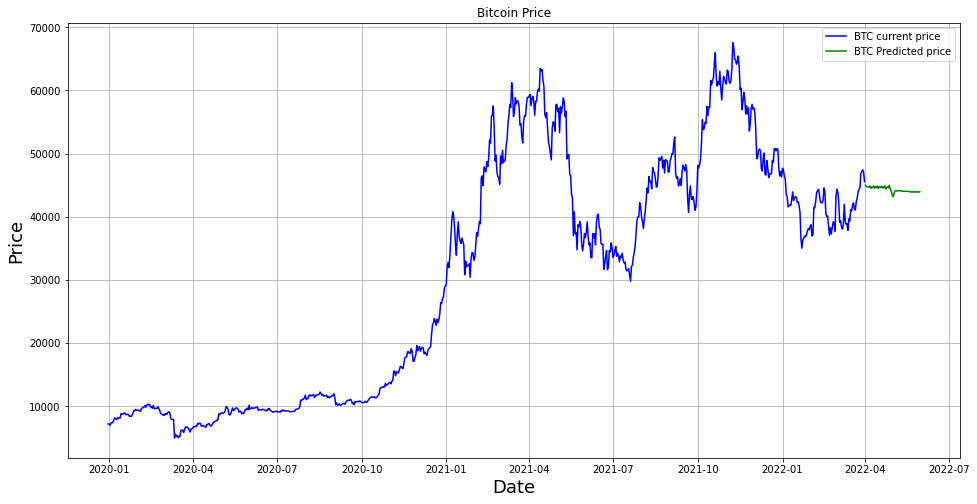

In [39]:
plt.figure(figsize = (16, 8))
plt.grid(True)

plt.plot(data['Close'], color = 'blue', label='BTC current price')
plt.plot(forecast, color = 'green', label='BTC Predicted price')

plt.title('Bitcoin Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend()
plt.show()

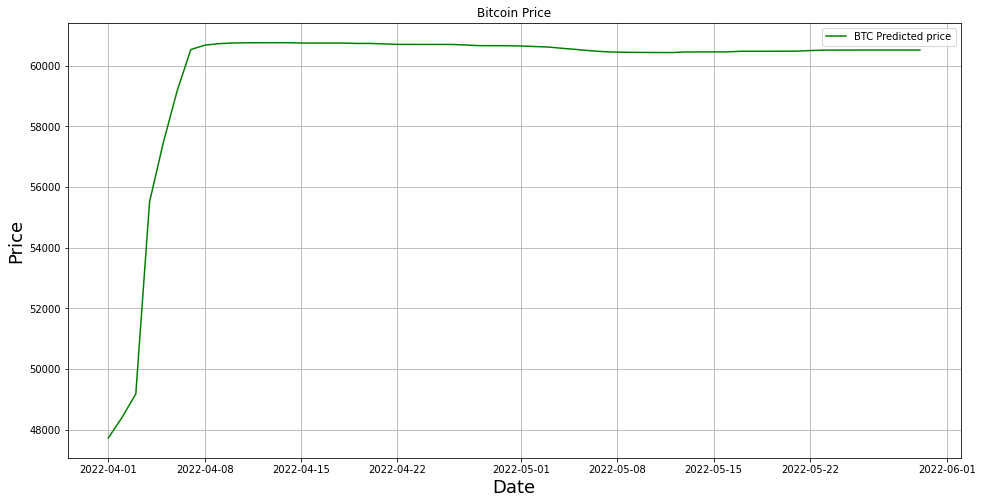

In [29]:
plt.figure(figsize = (16, 8))
plt.grid(True)

# plt.plot(data['Close'], color = 'blue', label='BTC current price')
plt.plot(forecast, color = 'green', label='BTC Predicted price')

plt.title('Bitcoin Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend()
plt.show()

In [26]:
forecast

,Close
2022-04-01,36161.932566
2022-04-02,36161.932566
2022-04-03,36161.932566
2022-04-04,36161.932566
2022-04-05,36161.932566
...,...
2022-06-25,36243.653676
2022-06-26,36359.022162
2022-06-27,36239.908647
2022-06-28,36161.932566
